<a href="https://colab.research.google.com/github/Suchi0506/DTAssignment_Quiz/blob/main/DTAssignmentQuiz_Intellipat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Pokemon.csv to Pokemon (2).csv


In [ ]:
df= pd.read_csv('Pokemon.csv')

In [ ]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [ ]:
df.drop(columns=['#'], inplace=True)

In [ ]:
#Number of pokemon are from the 5th generation
df[df['Generation']== 5].shape[0]


165

In [ ]:
# pokemon having the highest defense score
df[df['Defense']== df['Defense'].max()]

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


**Which columns are not having any kind of relationship with the generation
column?**

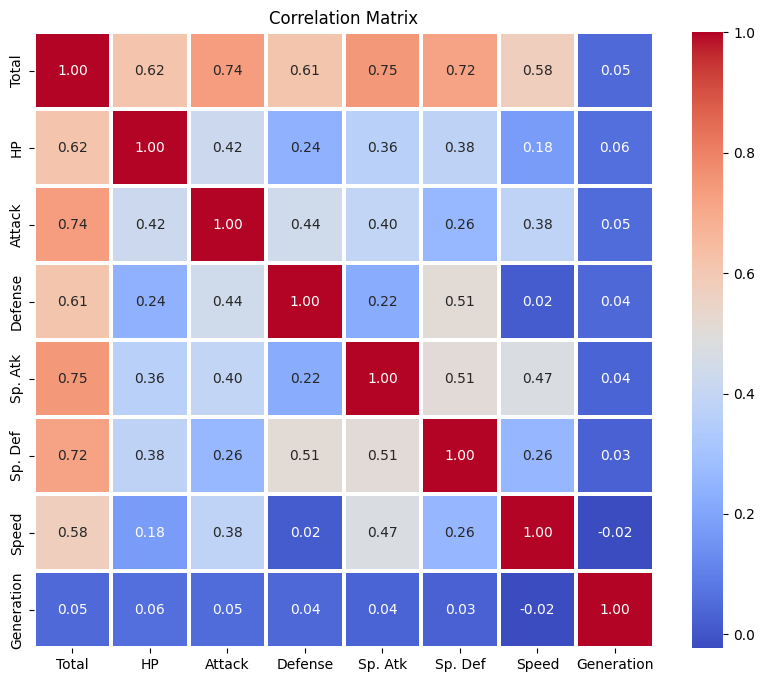

In [ ]:
# correlation matrix
df_numeric= df.select_dtypes(include=['number'])

corr_matrix = df_numeric.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1.5)
plt.title('Correlation Matrix')
plt.show()


**What is the precision of the Decision Tree model when the target is False?**

In [ ]:
X= df.drop(columns=['Legendary'])
y= df['Legendary']

In [ ]:
#Dropping the 'Name' column as itis a unique identifier for each pokemon
X.drop(columns=['Name'], inplace=True)

# Handling missing values (in 'Type 2' column)
X['Type 2'].fillna('None', inplace=True)

#Applying One Hot encoding to Type 1 and Type 2 columns
X=pd.get_dummies(X, columns=['Type 1', 'Type 2'])

In [ ]:
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type 1_Bug,Type 1_Dark,...,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_None,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,318,45,49,49,65,65,45,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,405,60,62,63,80,80,60,1,False,False,...,False,False,False,False,False,True,False,False,False,False
2,525,80,82,83,100,100,80,1,False,False,...,False,False,False,False,False,True,False,False,False,False
3,625,80,100,123,122,120,80,1,False,False,...,False,False,False,False,False,True,False,False,False,False
4,309,39,52,43,60,50,65,1,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score

# Splitting the dataset into training and testing sets (70:30 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred = dt_classifier.predict(X_test)

# Calculating precision for the False class (Legendary = False)
precision_false = precision_score(y_test, y_pred, pos_label=False)

print(f'Precision for False class: {precision_false}')

# Calculating precision for the True class (Legendary = True)
precision_true = precision_score(y_test, y_pred, pos_label=True)

print(f'Precision for True class: {precision_true}')

Precision for False class: 0.9537037037037037
Precision for True class: 0.4583333333333333


In [ ]:
#Sensitivity when target is True
from sklearn.metrics import recall_score

sensitivity_true = recall_score(y_test, y_pred, pos_label=True)

print(f'Sensitivity for True class: {sensitivity_true}')

Sensitivity for True class: 0.5238095238095238


In [ ]:
# Calculating the misclassified data
misclassified = (y_pred != y_test).sum()

# Calculating the total number of test samples
total = len(y_test)

# Calculating the percentage of misclassified data
misclassification_percentage = (misclassified / total) * 100

print(f'Misclassified Data Points: {misclassified}')
print(f'Total Data Points: {total}')
print(f'Misclassification Percentage: {misclassification_percentage:.2f}%')


Misclassified Data Points: 23
Total Data Points: 240
Misclassification Percentage: 9.58%
